In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [33]:
county = gpd.read_file('data/Davidson_County_Boundary.geojson')
wifi = gpd.read_file('data/Metro_Public_WiFi_Locations.geojson')
bikeways = gpd.read_file('data/bikeways.geojson')

In [39]:
bikeways.head( )

,OBJECTID,BikewayType,Status,OnStreetName,FromStreetName,ToStreetName,YearCompleted,District,geometry
0,1,WOL,Complete,Broadway,3rd Ave S,1st Ave S,2011.0,19,"LINESTRING (-86.77437 36.16225, -86.77597 36.1..."
1,2,BL,Complete,Division St,Buddy Killen Cir,Music Sq E,2004.0,19,"LINESTRING (-86.79191 36.15219, -86.79192 36.1..."
2,3,PBL,Complete,12th Ave S,Lawrence Ave,Division St,2023.0,"17, 18, 19","LINESTRING (-86.78432 36.15108, -86.78454 36.1..."
3,4,BL,Complete,Fort Negley Blvd,Chestnut St,Hamilton Ave,2014.0,17,"LINESTRING (-86.77578 36.14213, -86.77594 36.1..."
4,5,SSR,Completed,Gale Ln,Belmont Blvd,975' SW of 8th Ave S,2024.0,"17, 18","LINESTRING (-86.77650 36.11760, -86.77666 36.1..."


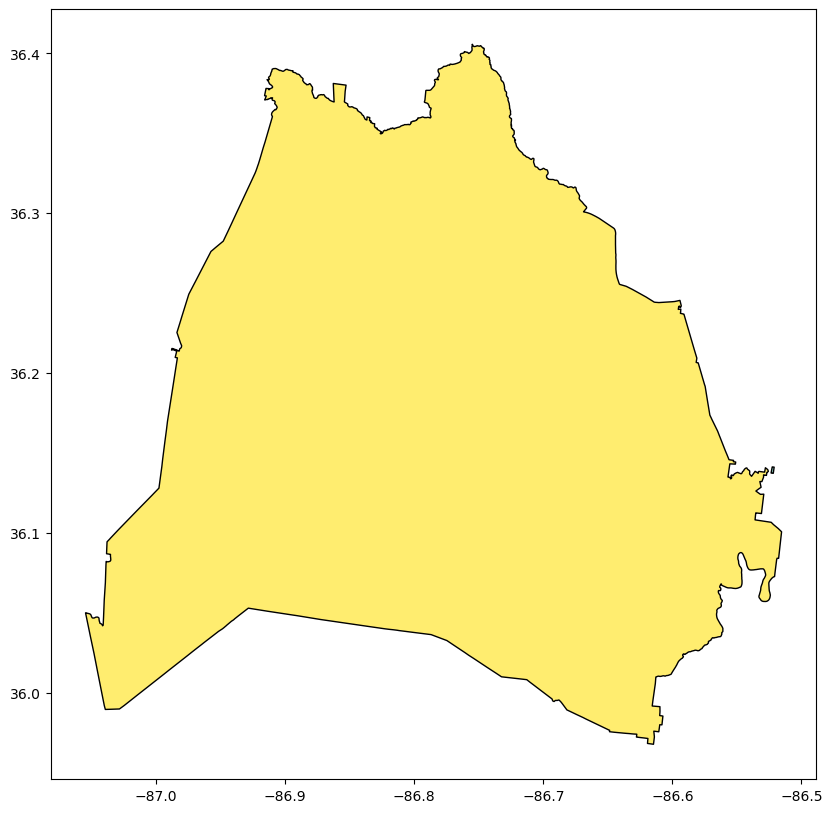

In [23]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, .8), 'ncol': 2}

county.plot(figsize=(10, 10),
              edgecolor = 'black',
              cmap = 'Set3')
plt.show()

In [27]:
county.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
wifi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

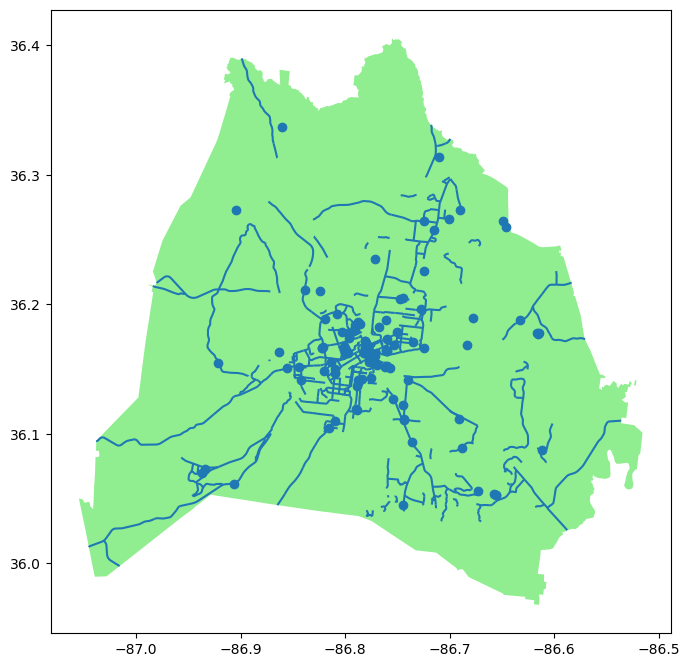

In [41]:
#fig, ax = matplotlib.subplots()
ax = county.plot(figsize = (8, 10), color = 'lightgreen')
wifi.plot( ax = ax);
bikeways.plot( ax = ax);
plt.show();

In [59]:
area_center = [bikeways.geometry.centroid.y.mean(), bikeways.geometry.centroid.x.mean()]
mymap = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(county).add_to(mymap)
folium.GeoJson(bikeways).add_to(mymap)
folium.GeoJson(wifi).add_to(mymap)

mymap

C:\Users\Garrett\AppData\Local\Temp\ipykernel_3448\1273123428.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_center = [bikeways.geometry.centroid.y.mean(), bikeways.geometry.centroid.x.mean()]
C:\Users\Garrett\AppData\Local\Temp\ipykernel_3448\1273123428.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_center = [bikeways.geometry.centroid.y.mean(), bikeways.geometry.centroid.x.mean()]


In [155]:

#This works but has a warning...
#area_center = [bikeways.geometry.centroid.y.mean(), bikeways.geometry.centroid.x.mean()]

temp = bikeways
area_center = [temp.to_crs('+proj=cea').centroid.to_crs(temp.crs).y.mean(), temp.to_crs('+proj=cea').centroid.to_crs(temp.crs).x.mean()]

mymap2 = folium.Map(location = area_center, zoom_start = 10.5)

folium.GeoJson(county).add_to(mymap2)
folium.GeoJson(bikeways).add_to(mymap2)
#folium.GeoJson(wifi).add_to(mymap2)

for row_index, row_values in wifi.iterrows():
    loc = [row_values['geometry'].y,row_values['geometry'].x]
    icon = folium.Icon(color='green', icon='wifi', prefix='fa')
    #icon = folium.CustomIcon('https://python-visualization.github.io/folium/latest/_static/folium_logo.png')
    pop = str(row_values['SiteName'])
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(mymap2)
    
mymap2